In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [38]:
directory="C:/Users/NURDAN/BITIRME/fontClassification7class/trainSyntheticPlusReal"

In [39]:
batch_size = 16
img_height = 100
img_width = 500

In [40]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2660 files belonging to 7 classes.
Using 2128 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2660 files belonging to 7 classes.
Using 532 files for validation.


In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 100, 500, 3)
(16,)


In [9]:
train_ds.class_names

['divani', 'kufi', 'muhakkak', 'nesih', 'rika', 'sulus', 'talik']

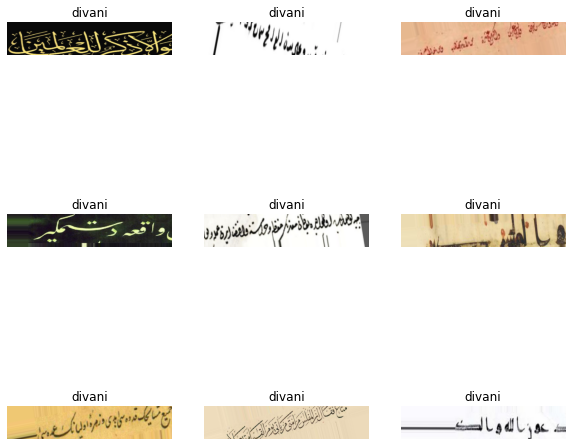

In [10]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [14]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [15]:
num_classes = 7

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 100, 500, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 100, 500, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 500, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 250, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 250, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 125, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 125, 64)      

In [18]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
133/133 [==============================] - 83s 600ms/step - loss: 2.0342 - accuracy: 0.1978 - val_loss: 1.9032 - val_accuracy: 0.1711
Epoch 2/100
133/133 [==============================] - 80s 603ms/step - loss: 1.8269 - accuracy: 0.2702 - val_loss: 1.8402 - val_accuracy: 0.2500
Epoch 3/100
133/133 [==============================] - 79s 593ms/step - loss: 1.6556 - accuracy: 0.3336 - val_loss: 1.4563 - val_accuracy: 0.3797
Epoch 4/100
133/133 [==============================] - 80s 600ms/step - loss: 1.4025 - accuracy: 0.4450 - val_loss: 1.4730 - val_accuracy: 0.3947
Epoch 5/100
133/133 [==============================] - 80s 599ms/step - loss: 1.2431 - accuracy: 0.5103 - val_loss: 1.2593 - val_accuracy: 0.5038
Epoch 6/100
133/133 [==============================] - 78s 584ms/step - loss: 1.1598 - accuracy: 0.5456 - val_loss: 1.2851 - val_accuracy: 0.5282
Epoch 7/100
133/133 [==============================] - 79s 593ms/step - loss: 1.0480 - accuracy: 0.5945 - val_loss: 1.5403 -

Epoch 57/100
133/133 [==============================] - 58s 438ms/step - loss: 0.2059 - accuracy: 0.9253 - val_loss: 0.7728 - val_accuracy: 0.7726
Epoch 58/100
133/133 [==============================] - 58s 437ms/step - loss: 0.2166 - accuracy: 0.9248 - val_loss: 0.7703 - val_accuracy: 0.7820
Epoch 59/100
133/133 [==============================] - 61s 463ms/step - loss: 0.1970 - accuracy: 0.9272 - val_loss: 0.8637 - val_accuracy: 0.7951
Epoch 60/100
133/133 [==============================] - 64s 485ms/step - loss: 0.1603 - accuracy: 0.9408 - val_loss: 0.9322 - val_accuracy: 0.7744
Epoch 61/100
133/133 [==============================] - 58s 438ms/step - loss: 0.1750 - accuracy: 0.9375 - val_loss: 0.7943 - val_accuracy: 0.7895
Epoch 62/100
133/133 [==============================] - 60s 450ms/step - loss: 0.1987 - accuracy: 0.9342 - val_loss: 0.7260 - val_accuracy: 0.7744
Epoch 63/100
133/133 [==============================] - 54s 404ms/step - loss: 0.2761 - accuracy: 0.9093 - val_loss: 0

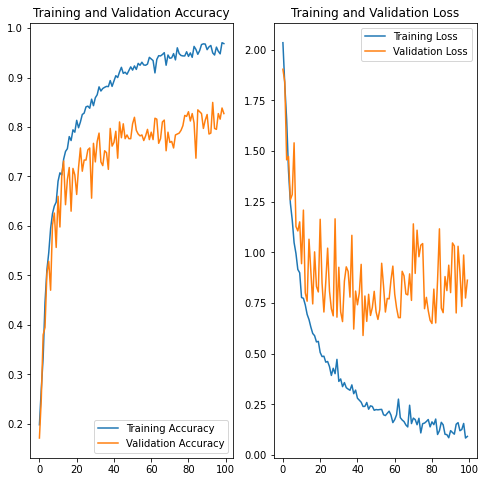

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
import os

directoryLabel="C:/Users/NURDAN/BITIRME/fontClassification7class/test/"
os.chdir(directoryLabel)
testLabels=os.listdir()

for label in testLabels:
    directoryData="C:/Users/NURDAN/BITIRME/fontClassification7class/test/"+label+"/"
    accuracyCount=0
    dataCount=0

    os.chdir(directoryData)
    testData=os.listdir()

    for data in testData:
        dataCount=dataCount+1
       
        img = tf.keras.utils.load_img(
            data, target_size=(img_height, img_width)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)]==label:
            accuracyCount=accuracyCount+1
        
        #print(
        #   "This image {} most likely belongs to {} with a {:.2f} percent confidence."
        #   .format(data,class_names[np.argmax(score)], 100 * np.max(score)))
        #
    print("{} türünden {} tane veriden {} tanesi doğru tahmin edildi ".format(label,dataCount,accuracyCount))

divani türünden 5 tane veriden 4 tanesi doğru tahmin edildi 
kufi türünden 5 tane veriden 4 tanesi doğru tahmin edildi 
muhakkak türünden 5 tane veriden 5 tanesi doğru tahmin edildi 
nesih türünden 5 tane veriden 4 tanesi doğru tahmin edildi 
rika türünden 5 tane veriden 4 tanesi doğru tahmin edildi 
sulus türünden 5 tane veriden 4 tanesi doğru tahmin edildi 
talik türünden 5 tane veriden 5 tanesi doğru tahmin edildi 
